In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits,fetch_openml

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [5]:
digits= load_digits()

In [6]:
print(digits.data.shape)

(1797, 64)


In [7]:
print(digits.target.shape)

(1797,)


In [8]:
def plot_images(data,target,img_shape=(8,8)):
    plt.figure(figsize=(20,5))
    for index,(image,label) in enumerate (zip(data[:5],target[:5])):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(image,img_shape),cmap=plt.cm.gray)
        plt.title("Training %i \n" %label,fontsize=20)

In [9]:
def plot_images(data,target,img_shape=(8,8)):
    plt.figure(figsize=(20,5))
    for index,(image,label) in enumerate (zip(data[:5],target[:5])):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(image,img_shape),cmap=plt.cm.gray)
        plt.title("Training %i\n" %label,fontsize=20)

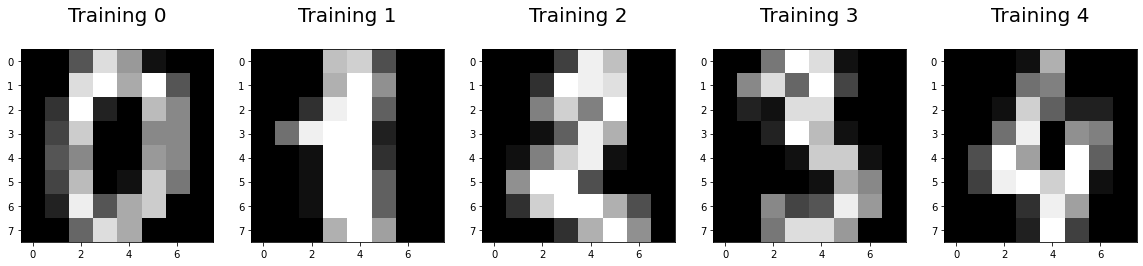

In [10]:
plot_images(digits.data,digits.target)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
clf = LogisticRegression()

In [15]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,train_size=0.75)

In [17]:
clf.fit(x_train,y_train)

C:\Users\Adarsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = clf.predict(x_test)

In [22]:
x_test

array([[ 0.,  0.,  1., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  4., ...,  8.,  0.,  0.],
       [ 0.,  0.,  3., ...,  7.,  0.,  0.],
       [ 0.,  1.,  9., ..., 10.,  1.,  0.]])

In [23]:
confusion_matrix(y_pred,y_test)

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 35,  1,  0,  1,  0,  1,  0,  1,  0],
       [ 1,  0, 36,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 47,  1,  0,  1,  0,  0],
       [ 1,  0,  0,  1,  0, 53,  0,  0,  2,  2],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  1, 45,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  1,  0, 40]], dtype=int64)

In [21]:
accuracy_score(y_pred,y_test)

0.9444444444444444

In [24]:
def get_misclassified_index(y_pred,y_test):
    misclassification=[]
    for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
        if predicted!=actual:
            misclassification.append(index)
            
    return misclassification

In [25]:
misclassification=get_misclassified_index(y_pred,y_test)

In [26]:
def plot_misclassifications(misclassification,img_shape=(8,8)):
    plt.figure(figsize=(20,4))
    for index,wrong in enumerate(misclassification[0:5]):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(x_test[wrong],img_shape),cmap=plt.cm.gray)
        plt.title("Predicted:{} Actual:{}".format(y_pred[wrong],y_test[wrong]))

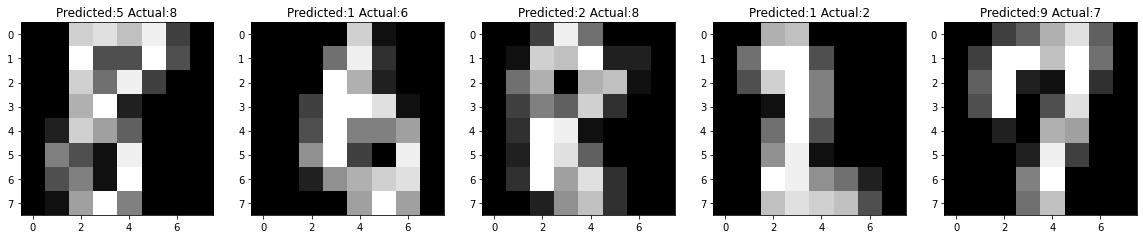

In [27]:
plot_misclassifications(misclassification)